# 7/8

In [1]:
# csv 파일 읽고 저장
import numpy as np
import pandas as pd
ar1 = np.arange(10).reshape(2,5)
df = pd.DataFrame(ar1,columns=list('abcde'))
df.to_csv('test.csv') #,index=False
### 저장할 때 index=False 를 붙이거나
### 불러올 때 index_col=0 붙이면
### 컬럼 읽어왔을 때 숫자 index 안나옴

In [3]:
df = pd.read_csv('test.csv',index_col=0) ### pd.read_csv : csv파일을 읽어와서 데이터프레임 형식으로 바꿔줌
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9


In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df1=df.copy()
print(type(df1))
df1

<class 'pandas.core.frame.DataFrame'>


,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9


In [6]:
df1.loc[5,7] = 0 ### 5,7은 str으로 들어감! 없는 행,열이니 추가! 나머지는 NaN값으로 채움
df1

,a,b,c,d,e,7
0,0.0,1.0,2.0,3.0,4.0,NaN
1,5.0,6.0,7.0,8.0,9.0,NaN
5,NaN,NaN,NaN,NaN,NaN,0.0


In [7]:
df1[['7']] = 5 ### 문자인덱스는 이름이 같아도 추가할 수 있음
df1

,a,b,c,d,e,7,7
0,0.0,1.0,2.0,3.0,4.0,NaN,5
1,5.0,6.0,7.0,8.0,9.0,NaN,5
5,NaN,NaN,NaN,NaN,NaN,0.0,5


In [8]:
### 대괄호 하나와 두개의 차이. 하나는 시리즈로 나오고, 두 개는 데이터프레임으로 나옴
print(type(df1['7']))
print(type(df1[['7']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
df1.iloc[2,5]

0.0

In [10]:
df1 = df.copy()
df1.loc[2,:] = 0
df1.loc[3,:] = 0
df1 = df1.astype(int)
df1

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,0,0,0,0,0
3,0,0,0,0,0


In [12]:
# json 파일 읽고 쓰기
df1.iloc[2] = 2
df1.iloc[3] = 3
df1

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,2,2,2,2,2
3,3,3,3,3,3


In [13]:
df1.to_json('test2.jason')
df_j = pd.read_json('test2.jason')
df_j

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,2,2,2,2,2
3,3,3,3,3,3


In [14]:
#바이너리 파일 만들고 읽고 쓰기 
#to_pickle사용 
#확장자는 pkl

df1.to_pickle('test3.pkl')
df1 = pd.read_pickle('test3.pkl')
df1

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,2,2,2,2,2
3,3,3,3,3,3


In [ ]:
# Q. 간단한 데이터프레임 작성 후 csv, json, pickle 형태로
# 저장 후 다시 불러와서 출력하세요.

In [15]:
import numpy as np
s1 = np.arange(1,5)
s2 = np.arange(6,10)
s3 = np.arange(11,15)
dfdf = pd.DataFrame([s1,s2,s3], index=['1행','2행','3행'], columns=['1열','2열','3열','4열'])
print(type(dfdf))
dfdf

<class 'pandas.core.frame.DataFrame'>


,1열,2열,3열,4열
1행,1,2,3,4
2행,6,7,8,9
3행,11,12,13,14


In [16]:
dfdf.to_csv('df.csv')
dfdf1 = pd.read_csv('df.csv',index_col=0) # csv저장 시 0컬럼에 인덱스 컬럼 생김. 불러올 때 삭제하기 : index_col=0
print(type(dfdf1))
dfdf1

<class 'pandas.core.frame.DataFrame'>


,1열,2열,3열,4열
1행,1,2,3,4
2행,6,7,8,9
3행,11,12,13,14


In [17]:
dfdf1.to_json('df.jason')
dfdfj = pd.read_json('df.jason')
print(type(dfdfj))
dfdfj

<class 'pandas.core.frame.DataFrame'>


,1열,2열,3열,4열
1행,1,2,3,4
2행,6,7,8,9
3행,11,12,13,14


In [18]:
dfdf1.to_pickle('df.pkl')
dfdfp = pd.read_pickle('df.pkl')
print(type(dfdfp))
dfdfp

<class 'pandas.core.frame.DataFrame'>


,1열,2열,3열,4열
1행,1,2,3,4
2행,6,7,8,9
3행,11,12,13,14


In [19]:
!pip install openpyxl

In [20]:
!pip install xlrd

     |████████████████████████████████| 96 kB 2.7 MB/s eta 0:00:01


In [21]:
# 엑셀 파일 읽고 쓰기
df = pd.read_excel('auto-mpg.xlsx')
df.head()
df.to_excel('test5.xlsx')
df = pd.read_excel('test5.xlsx', index_col=0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


- 컬럼의 속성은 동일한 형식으로 해야함.
- 엑셀의 피버테이블과 다름
- 데이터프레임은 동일한 형식을 가진 속성으로 컬럼이 구성되야함!

In [25]:
### 통계적으로 보고 싶으면
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


- count : 개수
- mean : 평균
- std : 표준편차

In [26]:
df.isnull() ### 0 값 있는지 확인(0이면 True, 아니면 False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum() ### 컬럼별 0인 값 개수 확인

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [28]:
df.isnull().sum().sum() ### 전체 0인 값 개수 확인

0

In [29]:
print(type(df.mpg))
df.mpg ### 특정 컬럼만 보기(Series로 나옴)

<class 'pandas.core.series.Series'>


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [30]:
print(type(df[['mpg']]))
df[['mpg']] ### 특정 컬럼만 보기(DataFrame으로 나옴)

<class 'pandas.core.frame.DataFrame'>


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


<AxesSubplot:>

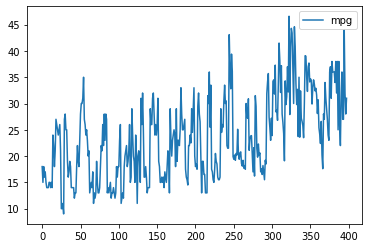

In [31]:
df[['mpg']].plot() ### 그래프보기

<AxesSubplot:ylabel='Frequency'>

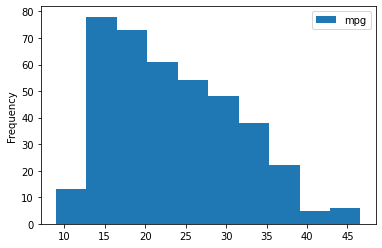

In [32]:
df[['mpg']].plot(kind='hist') ### 그래프(히스토그램)으로 보기